# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

[Link to data set](https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip)

In [1]:
# Load pickled data
import pickle
import numpy as np

training_file   = './traffic-signs-data/train.p'
validation_file = './traffic-signs-data/valid.p'
testing_file    = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)
n_valid = len(X_valid)
# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape
image_type =X_train.dtype
# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Image data type =", image_type)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Image data type = uint8
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

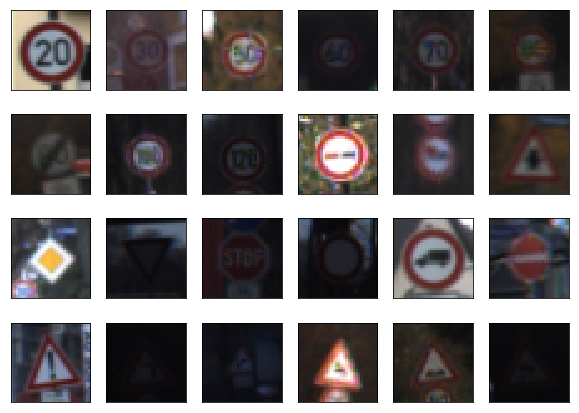

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline 
def showUnique(images, labels, file_name):
    unique_lables = np.unique(labels)
    image_list =[]
    for label in unique_lables:
        image_list.append(images[np.where(labels==label)[0][0]])

    fig = plt.figure(figsize=(10, 15))
    for image_index in range(24):
        ax = fig.add_subplot(8,6,image_index+1)
        image_name = image_index
        image = image_list[image_index]
        plt.imshow(image)
        ax.get_yaxis().set_ticks([])
        ax.get_xaxis().set_ticks([])
    plt.show()
    fig.savefig(file_name, bbox_inches='tight')
showUnique(X_train, y_train,'./report_img/original_train_set.png')

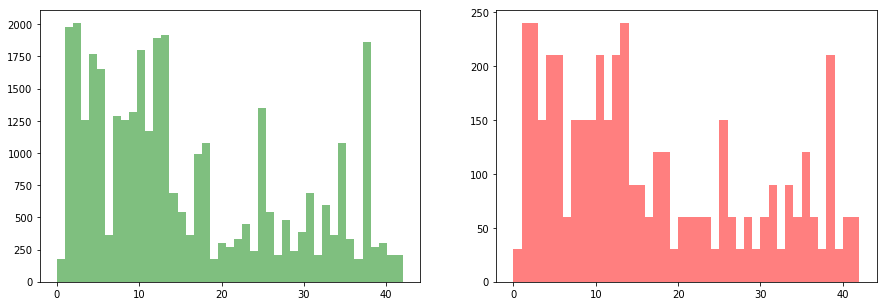

In [4]:
def scope_cell():
    # the histogram of the data
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot(1,2,1)
    n, bins, patches = plt.hist(y_train, 43, facecolor='green', alpha=0.5)
    ax = fig.add_subplot(1,2,2)
    plt.hist(y_valid, 42, facecolor='red', alpha=0.5)
    plt.show()
    fig.savefig('./report_img/hist_dataset.png', bbox_inches='tight')
scope_cell()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


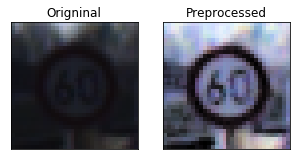

In [5]:

import cv2
from skimage import img_as_ubyte
from skimage import img_as_float

def enhance_img(image):
    '''
    Preprocessing of the image which is part of the network
    '''
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    hsv_image[:,:,2]= cv2.equalizeHist(hsv_image[:,:,2])
    #rgb_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
    return img_as_float(hsv_image)

def getEvenlyDistributedImageSet(images, labels):
    '''
    Preprocessing of the data set will be used during training
    to ensure flat distribution of classes in training sets
    '''
    unique_lables = np.unique(labels)
    num_l = len(unique_lables)
    n, bin_edge = np.histogram(labels, num_l)
    min_num = np.min(n)
    images_new = np.empty([num_l*min_num, 32, 32, 3],dtype=images.dtype)
    labels_new = np.empty([num_l*min_num],dtype=labels.dtype)
    for label in unique_lables:
        images_new[label*min_num:(label+1)*min_num,:,:,:] = images[np.where(labels==label)[0][0:min_num],:,:,:]
        labels_new[label*min_num:(label+1)*min_num]=label
    return images_new, labels_new
def scope_cell():
    image_index=6000
    fig = plt.figure(figsize=(5, 3))
    ax = fig.add_subplot(1,2,1)
    image = X_train[image_index,:,:,:]
    plt.imshow(image)
    ax.get_yaxis().set_ticks([])
    ax.get_xaxis().set_ticks([])
    ax.set_title('Origninal')
    ax = fig.add_subplot(1,2,2)
    plt.imshow(cv2.cvtColor(img_as_ubyte(enhance_img(image)), cv2.COLOR_HSV2RGB))
    ax.get_yaxis().set_ticks([])
    ax.get_xaxis().set_ticks([])
    ax.set_title('Preprocessed')
    plt.show()
    fig.savefig('./report_img/enh_img.png', bbox_inches='tight')
scope_cell()

In [6]:
from tqdm import tqdm
def resize11(image):
    return cv2.resize(image,(37, 37), interpolation = cv2.INTER_LINEAR)
def crop(image,x,y):
    return image[y:y+32,x:x+32]
def rot(image, angle):
    rows,cols = 32,32
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle, 1.1)
    return cv2.warpAffine(image,M,(cols,rows))
def tiltUp(image):
    rows,cols,ch = image.shape
    pts1 = np.float32([[5,5],[32-5,5],[0,32],[32,32]])
    pts2 = np.float32([[0,0],[32,0],[0,32],[32,32]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(image,M,(32,32))
    return dst
def tiltDown(image):
    rows,cols,ch = image.shape
    pts1 = np.float32([[0,0],[32,0],[5,32-5],[32-5,32-5]])
    pts2 = np.float32([[0,0],[32,0],[0,32],[32,32]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(image,M,(32,32))
    return dst
def twistLeft(image):
    rows,cols,ch = image.shape
    pts1 = np.float32([[0,0],[32-5,5],[0,32],[32-5,32-5]])
    pts2 = np.float32([[0,0],[32,0],[0,32],[32,32]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(image,M,(32,32))
    return dst

def twistRight(image):
    rows,cols,ch = image.shape
    pts1 = np.float32([[5,5],[32,0],[5,32-5],[32,32]])
    pts2 = np.float32([[0,0],[32,0],[0,32],[32,32]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(image,M,(32,32))
    return dst

def shiftUp(image):
    return crop(resize11(image),5,5)
def shiftDown(image):
    return crop(resize11(image),0,0)
def rotCCW(image):
    return rot(image,-10)
def rotCW(image):
    return rot(image,10)
def gaussian(image):
    return cv2.blur(image,(3,3))
def applyToAll(image_set, label_set, operation, outtype):
    images_p = np.empty_like(image_set,dtype=outtype)
    label_p = np.empty_like(label_set)
    for image_index in tqdm(range(image_set.shape[0])):
        newimg = operation(image_set[image_index]);
        newlabel = label_set[image_index]
        images_p[image_index] = newimg
        label_p[image_index]  = newlabel
    return images_p, label_p


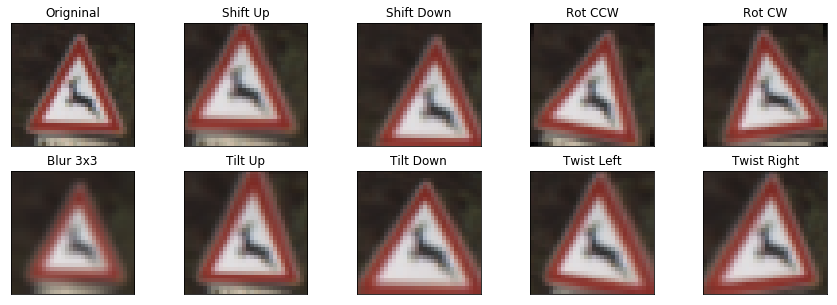

In [7]:
def scope_cell():
    def original(img):
        return img
    augment_list   = [ original,\
                       shiftUp,shiftDown,\
                      rotCCW,rotCW,\
                      gaussian,\
                      tiltUp,tiltDown,twistLeft,twistRight]
    augment_list_n = ['Origninal',\
                      'Shift Up', 'Shift Down',\
                      'Rot CCW', 'Rot CW',\
                      'Blur 3x3',\
                      'Tilt Up','Tilt Down','Twist Left', 'Twist Right']
    image_index=500
    fig = plt.figure(figsize=(15, 5))
    for aug_index in range(len(augment_list)):
        ax = fig.add_subplot(2,len(augment_list)/2,aug_index+1)
        image = X_train[image_index,:,:,:]
        plt.imshow(augment_list[aug_index](image))
        ax.get_yaxis().set_ticks([])
        ax.get_xaxis().set_ticks([])
        ax.set_title(augment_list_n[aug_index])
    plt.show()
    fig.savefig('./report_img/aug_img.png', bbox_inches='tight')
scope_cell()

In [8]:
from tqdm import tqdm
def augment_preprocess_data_set(X_data,y_data):
    ''' data set is augmented with transformed images and preprocess for speed of learing'''
    agugment_list = [shiftUp, shiftDown,\
                     rotCCW,rotCW,\
                     gaussian,\
                     tiltUp,tiltDown,twistLeft,twistRight]
    X_data_aug = X_data
    y_data_aug = y_data
    for aug_index in range(len(agugment_list)):
        X_data_t, y_data_t = applyToAll(X_data, y_data, agugment_list[aug_index], X_data.dtype)
        X_data_aug = np.append(X_data_aug, X_data_t, axis=0)
        y_data_aug = np.append(y_data_aug, y_data_t)
    return applyToAll(X_data_aug, y_data_aug, enhance_img, np.float32)

X_train_i, y_train_i = augment_preprocess_data_set(X_train, y_train)

100%|██████████| 347990/347990 [00:33<00:00, 10439.45it/s]


In [9]:
X_valid_p, y_valid_p = applyToAll(X_valid, y_valid, enhance_img, np.float32)

100%|██████████| 4410/4410 [00:00<00:00, 10213.76it/s]


### Model Architecture

(1, 43)


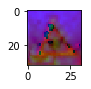

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten
import tensorflow as tf

tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32, 32, 3), name = 'image')
y = tf.placeholder(tf.int32, (None), name = 'class')
keep_prob = tf.placeholder(tf.float32, name = 'keep_prob')
one_hot_y = tf.one_hot(y, 43)

mu_w = 0
sigma_w = 0.1
mu_b = 0.01
sigma_b = 0.01

var = {
    'Conv1w': tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 10),  mean = mu_w, stddev = sigma_w), name = 'Conv1w'),
    'Conv1b': tf.Variable(tf.truncated_normal(shape=([10]),         mean = mu_b, stddev = sigma_b), name = 'Conv1b'),
    'Conv2w': tf.Variable(tf.truncated_normal(shape=(3, 3, 10, 10), mean = mu_w, stddev = sigma_w), name = 'Conv2w'),
    'Conv2b': tf.Variable(tf.truncated_normal(shape=([10]),         mean = mu_b, stddev = sigma_b), name = 'Conv2b'),
    'Conv3w': tf.Variable(tf.truncated_normal(shape=(3, 3, 10, 10), mean = mu_w, stddev = sigma_w), name = 'Conv3w'),
    'Conv3b': tf.Variable(tf.truncated_normal(shape=([10]),         mean = mu_b, stddev = sigma_b), name = 'Conv3b'),
    'Conv4w': tf.Variable(tf.truncated_normal(shape=(3, 3, 10, 5),  mean = mu_w, stddev = sigma_w), name = 'Conv4w'),
    'Conv4b': tf.Variable(tf.truncated_normal(shape=([5]),          mean = mu_b, stddev = sigma_b), name = 'Conv4b'),
    'ConvSw': tf.Variable(tf.truncated_normal(shape=(5, 5, 10, 5),  mean = mu_w, stddev = sigma_w), name = 'ConvSw'),
    'ConvSb': tf.Variable(tf.truncated_normal(shape=([5]),          mean = mu_b, stddev = sigma_b), name = 'ConvSb'),
    'FCRw':   tf.Variable(tf.truncated_normal(shape=(170, 129),     mean = mu_w, stddev = sigma_w), name = 'FCRw' ),
    'FCRb':   tf.Variable(tf.truncated_normal(shape=([129]),        mean = mu_b, stddev = sigma_b), name = 'FCRb' ),
    'FCw':    tf.Variable(tf.truncated_normal(shape=(129, 43),      mean = mu_w, stddev = sigma_w), name = 'FCw'  ),
    'FCb':    tf.Variable(tf.truncated_normal(shape=([43]),         mean = mu_b, stddev = sigma_b), name = 'FCb'  )   
}

#graph
graph_root    = tf.nn.conv2d(x, var['Conv1w'], strides=[1, 1, 1, 1], padding='VALID') + var['Conv1b']
graph_root    = tf.nn.relu(graph_root)
graph_root    = tf.nn.dropout(graph_root, keep_prob)

graph_root    = tf.nn.conv2d(graph_root, var['Conv2w'], strides=[1, 1, 1, 1], padding='VALID') + var['Conv2b']
graph_root    = tf.nn.relu(graph_root)
graph_branch1 = tf.nn.max_pool(graph_root, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
graph_branch2 = tf.nn.max_pool(graph_root, ksize=[1, 4, 4, 1], strides=[1, 4, 4, 1], padding='VALID')

graph_branch1  = tf.nn.conv2d(graph_branch1, var['Conv3w'], strides=[1, 1, 1, 1], padding='VALID') + var['Conv3b']
graph_branch1  = tf.nn.relu(graph_branch1)

graph_branch1  = tf.nn.conv2d(graph_branch1, var['Conv4w'], strides=[1, 1, 1, 1], padding='VALID') + var['Conv4b']
graph_branch1  = tf.nn.relu(graph_branch1)
graph_branch1  = tf.nn.max_pool(graph_branch1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
graph_branch1  = tf.nn.dropout(graph_branch1, keep_prob)
graph_branch1  = flatten(graph_branch1)

graph_branch2  = tf.nn.conv2d(graph_branch2, var['ConvSw'], strides=[1, 1, 1, 1], padding='VALID') + var['ConvSb']
graph_branch2  = tf.nn.relu(graph_branch2)
graph_branch2  = tf.nn.dropout(graph_branch2, keep_prob)
graph_branch2  = flatten(graph_branch2)
final = tf.concat(1,[graph_branch1, graph_branch2])


final    = tf.matmul(final, var['FCRw']) + var['FCRb']
final    = tf.nn.dropout(tf.nn.relu(final), keep_prob)
logits   = tf.matmul(final, var['FCw']) + var['FCb']

tf.add_to_collection("logits", logits)


def scope_cell():
    import random
    #test
    index = random.randint(0, len(X_train_i))
    image = X_train_i[index].squeeze()

    plt.figure(figsize=(1,1))
    plt.imshow(image)

    def ybrNet_test(x_value): 
        session = tf.Session()
        session.run(tf.global_variables_initializer())  
        result = session.run(logits, feed_dict = {'image:0': x_value, 'keep_prob:0':1.0})
        return result
    result = ybrNet_test([X_train_i[index]])
    print(result.shape)
scope_cell()

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.



In [12]:
###Define train and evaluate operations
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
tf.add_to_collection("accuracy_operation", accuracy_operation)

rate = 0.001
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)


tf.add_to_collection("loss_operation", loss_operation)

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
tf.add_to_collection("training_operation", training_operation)

saver = tf.train.Saver()

def evaluate(X_data, y_data, sess, batch_size):
    num_examples = len(X_data)
    total_accuracy = 0
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

100%|██████████| 100/100 [00:02<00:00, 37.94it/s]


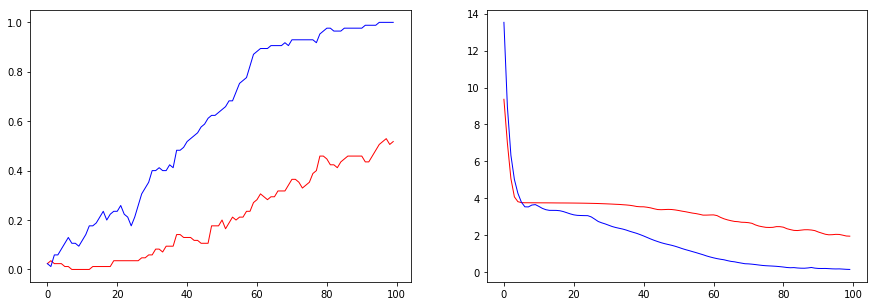

In [13]:
from sklearn.utils import shuffle
from IPython import display
def test_overfit(X_data, y_data, keep_prob_value):
    unique_lables = np.unique(y_data)
    X_temp, y_temp = shuffle(X_data, y_data)
    X_o = np.empty([len(unique_lables)*2,32,32,3],dtype = X_temp.dtype)
    y_o = np.empty(len(unique_lables)*2,dtype = y_temp.dtype)
    for label_index in range(len(unique_lables)):
        label = unique_lables[label_index]
        X_o[label_index*2:label_index*2+2,:,:,:] = X_data[np.where(y_train==label)[0][0:2]]
        y_o[label_index*2:label_index*2+2] = label
    # Test model capacity and correcteness by overfitting a small sample data
    # over fit test
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = X_o.shape[0]
        X_o, y_o = shuffle(X_o, y_o)
        train_accuracy = np.zeros(100)
        train_loss = np.zeros(100)
        for i in tqdm(range(100)):
            batch_x, batch_y = X_o[1:num_examples], y_o[1:num_examples]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: keep_prob_value})
            train_accuracy[i]=(evaluate(batch_x, batch_y, sess, num_examples))
            train_loss[i] = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
    return train_accuracy, train_loss
def cell_scope():
    train_accuracy_75, train_loss_75 = test_overfit(X_train, y_train, 0.75)
    train_accuracy_95, train_loss_95 = test_overfit(X_train, y_train, 0.95)
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot(1,2,1)
    plt.plot(train_accuracy_75, 'r-', linewidth=1)
    plt.plot(train_accuracy_95, 'b-', linewidth=1)
    ax = fig.add_subplot(1,2,2)
    plt.plot(train_loss_75, 'r-', linewidth=1)
    plt.plot(train_loss_95, 'b-', linewidth=1)
    fig.savefig('./report_img/overfit.png', bbox_inches='tight')
cell_scope()

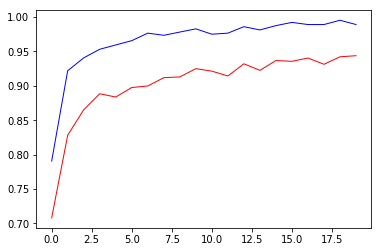

EPOCH 20 ...
Validation Accuracy = 0.944
Train  Accuracy = 0.989
Model saved
DONE: Model saved


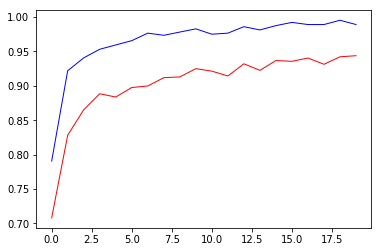

In [14]:
def train_final(X_data, y_data):
    BATCH_SIZE  =  128
    EPOCHS      =  20 #Actual used for final training 100
    valid_accuracy_best = 0.0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        batch_accuracy = np.zeros(EPOCHS)
        valid_accuracy = np.zeros(EPOCHS)
        print("Training...")
        print()
        for i in range(EPOCHS):
            X_train_i, y_train_i = shuffle(X_data, y_data)
            print("shuffle...")
            X_train_p, y_train_p = getEvenlyDistributedImageSet(X_train_i, y_train_i)
            print("flat distribution...")
            X_train_p, y_train_p = shuffle(X_train_p, y_train_p)
            print("shuffle...")
            num_examples = len(X_train_p)
            for offset in tqdm(range(0, num_examples, BATCH_SIZE)):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train_p[offset:end], y_train_p[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.87})

            valid_accuracy[i] = evaluate(X_valid_p, y_valid_p, sess, BATCH_SIZE)
            batch_accuracy[i] = evaluate(X_train_p[0:BATCH_SIZE*5], y_train_p[0:BATCH_SIZE*5], sess, BATCH_SIZE)
            display.clear_output(wait=True)
            plt.cla()
            plt.plot(valid_accuracy, 'r-', linewidth=1)
            plt.plot(batch_accuracy, 'b-', linewidth=1)
            display.display(plt.gcf())
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(valid_accuracy[i]))
            print("Train  Accuracy = {:.3f}".format(batch_accuracy[i]))
            if valid_accuracy_best < valid_accuracy[i]:
                valid_accuracy_best = valid_accuracy[i]
                saver.save(sess, './ybrnet6')
                print("Model saved")

        print("DONE: Model saved")
train_final(X_train_i, y_train_i)

In [15]:
import tensorflow as tf
model_file_name = './ybrnet5'

tf.reset_default_graph()
new_saver = tf.train.import_meta_graph(model_file_name+'.meta')
sess = tf.Session()
new_saver.restore(sess, model_file_name)

logits=tf.get_collection('logits')[0]
accuracy_operation = tf.get_collection("accuracy_operation")[0]
prediction = tf.argmax(logits, 1)
prob_k = tf.nn.top_k(tf.nn.softmax(logits),3)

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    BATCH_SIZE = 100
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={'image:0': batch_x, 'class:0': batch_y, 'keep_prob:0': 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
print('Done')    

Done


100%|██████████| 12630/12630 [00:01<00:00, 10527.47it/s]
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float32 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


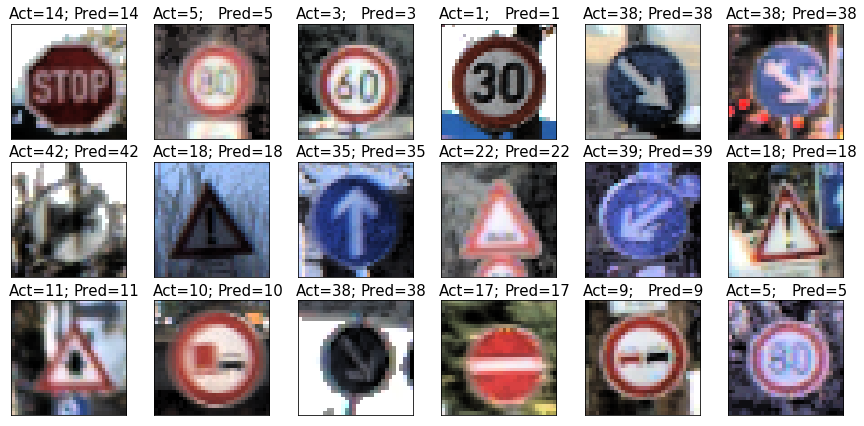

Final test accuracy is  0.943626316313


In [16]:
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline
def showWithLabels(X_data, y_data):
    X_data1, y_data1 = shuffle(X_data, y_data)
    fig = plt.figure(figsize=(15, 25))
    num_img = min([18, X_data1.shape[0]])
    for image_index in range(num_img):
        ax = fig.add_subplot(10,6,image_index+1)
        image=X_data1[image_index,:,:,:]
        plt.imshow(( cv2.cvtColor(img_as_ubyte(image), cv2.COLOR_HSV2RGB)))    
        ax.get_yaxis().set_ticks([])
        ax.get_xaxis().set_ticks([])
        result = sess.run(prediction,\
                          feed_dict = {'image:0': [X_data1[image_index,:,:,:]], 'keep_prob:0': 1.0 })
        ax.text(-1,-2,'Act='+'{:1.0f}'.format(y_data1[image_index])+';', fontsize=15)
        ax.text(17, -2, 'Pred='+'{:1.0f}'.format(result[:][0]), fontsize=15)
    plt.show()
    
def scope0():
    def loadImagesFromFile(file_name):
        with open(file_name, mode='rb') as f:
            data = pickle.load(f)
        return applyToAll(data['features'], data['labels'], enhance_img, np.float32)

    X_test, y_test = loadImagesFromFile(testing_file)
    showWithLabels(X_test, y_test)
    print("Final test accuracy is ",evaluate(X_test, y_test))
scope0()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

  0%|          | 0/6 [00:00<?, ?it/s]/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float32 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
100%|██████████| 6/6 [00:00<00:00, 5921.37it/s]


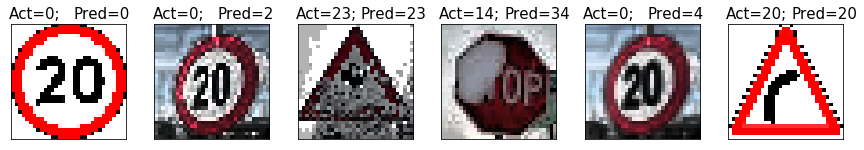

Final test accuracy on new images is  0.5


In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg
from skimage import img_as_ubyte
def loadImagesFromDir(dir_name):
    file_list = os.listdir(dir_name)
    image_list = []
    for file_name in  file_list:
        if file_name.endswith(".png"):
            image_list.append(file_name)
    image_list.sort()
    X_test_my = np.empty([len(image_list),32,32,3], dtype=np.uint8)
    y_test_my = np.array([23, 14, 0, 20, 0, 0], dtype=np.uint8)
    for image_index in tqdm(range(len(image_list))):
        image_name = image_list[image_index]
        image = img_as_ubyte(mpimg.imread('test_img/' + image_name)[:,:,0:3])
        image_res = cv2.resize(image,(32, 32), interpolation = cv2.INTER_CUBIC)
        X_test_my[image_index,:,:,:] = image_res
    return applyToAll(X_test_my, y_test_my, enhance_img, np.float32)

def scope_cell():
    X_my, y_my = loadImagesFromDir("test_img/")
    showWithLabels(X_my, y_my)
    print("Final test accuracy on new images is ", evaluate(X_my, y_my))
scope_cell()

### Predict the Sign Type for Each Image

  0%|          | 0/6 [00:00<?, ?it/s]/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float32 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
100%|██████████| 6/6 [00:00<00:00, 7223.26it/s]


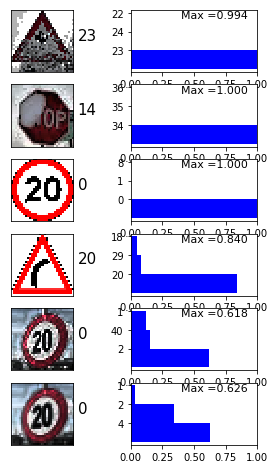

In [18]:
def showWithProb(X_data, y_data):
    X_data1, y_data1 = X_data, y_data
    fig = plt.figure(figsize=(5, 8))
    num_img = min([20, X_data1.shape[0]])
    for image_index in range(num_img):
        ax = fig.add_subplot(num_img,2,image_index*2+1)
        image=X_data1[image_index,:,:,:]
        plt.imshow(( cv2.cvtColor(img_as_ubyte(image), cv2.COLOR_HSV2RGB)))    
        ax.get_yaxis().set_ticks([])
        ax.get_xaxis().set_ticks([])
        result = sess.run(prob_k,\
                          feed_dict = {'image:0': [X_data1[image_index,:,:,:]], 'keep_prob:0': 1.0 })
        ax.text(34,15,y_data1[image_index], fontsize=15)
        ax = fig.add_subplot(num_img,2,image_index*2+2)
        ax.barh(range(3), result.values[0], 1, color='b')
        ax.set_yticks(np.array(range(3)) + 0.5)
        ax.set_yticklabels(result.indices[0])
        ax.set_xlim([0,1.0])
        ax.text(0.4, 2.2, 'Max ='+'{:1.3f}'.format(np.max(result.values[0])), fontsize=11)
    plt.show()
    fig.savefig('./report_img/softmax_my.png', bbox_inches='tight')
def scope_cell():   
    X_my, y_my = loadImagesFromDir("test_img/")
    showWithProb(X_my, y_my)
scope_cell()

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [19]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

def scope_cell():
    prob_5 = tf.nn.top_k(tf.nn.softmax(logits),5)
    X_my, y_my = loadImagesFromDir("test_img/")
    num_img = X_my.shape[0]
    for image_index in range(num_img):
        result = sess.run(prob_5,\
                          feed_dict = {'image:0': [X_my[image_index,:,:,:]], 'keep_prob:0': 1.0 })
        print('For image with class', y_my[image_index])
        print('Classes = ', result.indices[0])
        print('Probablities = ', result.values[0])
scope_cell()

  0%|          | 0/6 [00:00<?, ?it/s]/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float32 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
100%|██████████| 6/6 [00:00<00:00, 7153.45it/s]

For image with class 23
Classes =  [23 24 22 25 37]
Probablities =  [  9.93658483e-01   4.19229083e-03   1.65350433e-03   2.72326142e-04
   2.15775610e-04]
For image with class 14
Classes =  [34 35 36 38 14]
Probablities =  [  9.99534845e-01   2.37308093e-04   1.58214898e-04   6.95528142e-05
   8.15721624e-09]
For image with class 0
Classes =  [0 1 8 7 4]
Probablities =  [  9.99999762e-01   2.02684816e-07   2.06173212e-08   3.57983476e-10
   5.87858720e-11]
For image with class 20
Classes =  [20 29 18 26 24]
Probablities =  [ 0.84037101  0.08098957  0.05307245  0.02259096  0.00292351]
For image with class 0
Classes =  [ 2 40  1  4  8]
Probablities =  [ 0.61841959  0.15594423  0.12173167  0.09097861  0.00902502]
For image with class 0
Classes =  [4 2 1 5 8]
Probablities =  [ 0.62626374  0.34003839  0.03134417  0.00109648  0.0009566 ]


> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

[//]: # (Image References)

[original_train_set]: ./report_img/original_train_set.png "Visualization"
[hist_dataset]: ./report_img/hist_dataset.png "Distribution"
[enh_image]: ./report_img/enh_img.png "Image enhance"
[aug_image]: ./report_img/aug_img.png "Image modified"
[my_softmax]: ./report_img/softmax_my.png "Softmax visualization"
[test1]: ./test_img/test1.png "Curve to the right"
[test2]: ./test_img/test2.png "Speed limit 20"
[test3]: ./test_img/test3.png "Stop"
[test4]: ./test_img/test4.png "Speed limit 20"
[test5]: ./test_img/test5.png "Dangerous curve"

 
 # Traffic Sign Recognition Project 
 
 ## Abstract
 
The goals of this project are the following:
* Explore, summarize and visualize given data set
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze the softmax probabilities of the new images 
 
A new Neural Network arhcitecture was build for Traffic Sign Recognition based on literature review. This architecture is capable of achiving validation accuracy 96.5% and test accuracy   94.3% on given sets. It also capable of generalizing the photo images to conceptual images of a sign, but it only shows 50% accuracy on complex images chosen from Internet.

The code is accesible on [github link](https://github.com/...)
 
 ## Data Set Summary & Exploration

The provided data bundle consist of 34799 images available for training, 4410 images for validation and 12630 images for the final test. Each image is a 32 by 32 pixels with three 8bit-channels of RGB colors. There are 43 categories of traffic signs. (Summary is attained in 2nd cell of notebook)

The images for training data set are visualized below by displaying one sample from first 26 categories sorted by class id. It is interesting to note that without image processing recognizing the traffic signs in this data set can be challenging even of an experienced driver. The examples of such complicated images are in column 2 of rows 3 and 4. (showUnique  function in 3 cell i used to create the figure)

![alt text][original_train_set]

The distribution of images over the categories of traffic signs in training and validation set are visualized below using a histogram. It is, arguably, the most important information about the data set. The histogram of the training set(green) shows that there are almost 10 times more images of class 1 then there are of class 0. Such strong disbalance in available images will create a prediction bias in the neural network after training. It is because neural networks capture statistical information of the data set as well as relations between image content and class.  Furthermore, the validation set contains similar disbalance. Thus validation accuracy will be high due to the statical expectation of specific classes, while this assumption is not valid for an unknown "test" data set.

![alt text][hist_dataset]

In summary, the data set contains low-quality images with low resolution, color depth, and contrast. The data set has an uneven distribution over image classes, that may hamper the prediction model.

 ## Image preprocessing
 
It is clearly preferable that any the neural network learn all necessary processing of the data, as it will result in simpler and more uniform implemenation. However, [P. Sermanet and Y. LeCun](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf)  clearly state that switching away from RGB data repsentation and contrast normalization provide significant improvement during classification task.

During this project, three color representations RGB, YUV, HSV were tested. Using YUV or HSV results in ~2-3 % improvement on the accuracy of classification on the validation set compare to RGB. Therefore HSV representation is used for final report. 

To improve image contrast, a histogram equalization is used on "value" channel  (brightness of a color) of the HSV image representation. This operation calculates a distribution of the "value" over the image and stretches the distribution to a complete available range.  This results in an increase of global and local contrast with minimal change in image content. It does, however, result in discolorization, i.e. color shift artifacts on the image. This technique also improves the accuracy of classification.

The image is then cast to float representation; this effectively means that all values in the image are range from 0.0 to 1.0. It is done to facilitate the training process as smaller numbers should increase the initial convergence. The data is not zero centered, as several experiments did not show any improvement if it is done.

The code for image preprocessing is defined in function enhance_img(cell 5 of the notebook). The original and preprocessed images are shown below.

![alt text][enh_image]

 ## Data set augmentation
 
Unfortunately, as can be seen for the histogram above there only 180 images are available for "Speed limit (20km/h)" sign and several other signs also have a small number of images.  This can result that network is not able to learn those classes very well. Therefore the original data set is augmented with modified images. All images are subjected to deformations and added into the data set. 
Following deformation are applied to the images (augmentation functions are defined in cell 6):
 + zoom 110% and crop to size in center
 + zoom 110% and crop to size up left corner 
 + zoom 110% and crop to size down right corner
 + rotate clockwise and counterclockwise 10 deg
 + Gaussian filter with kernel 3
 + 4 perspective deformations are applied to imitate photos taken from various angles
The figure below illustrate the augmented set for one image:

![alt text][aug_image]
 
Using these augmentations expand the train data set up to 347990 images. This new dataset still has a significant disbalance in the number of images per sign class. That will be addressed at training time.

## Design and Test a The Neural Network 

<img style="float: right;height:800px;" src="./report_img/ybrnet.png"/>

### Network architecture

The architecture of the final neural network is depicted in the figure on the right (defined in cell 10). The network can be divided into three conceptual stages. 

The first stage receives the preprocessed image. The stage consists of two convolution layers with ReLu activations and separated by dropout layer. The intention of the stage is to extract low-level features from pixel values.  

The second stage receives the low-level features extracted by the first. The second stage consists of two branches. The right branch does a fine grain processing. The convolutional filters and max pool operation are chosen to smallest size with the intention to capture the local information about the image. The left branch is on the other hand, quickly reduce the dimensionality of the problem using MaxPool operation with big filter size and big stride. This branch is intended to grasp global information about the image.

The third stage consists of two fully connected layers. It is the primal task to use features extracted by the second stage to perform the actual classification task. Two layers are used to allow the network to learn the ["kernel trick"](https://people.eecs.berkeley.edu/~jordan/courses/281B-spring04/lectures/lec3.pdf) for the separation of classes. 

### Network design process

For the purpose of gaining more experience with TensorFlow, I have chosen to design my network. The design is heavily relying on literature suggestions, with minor adjustments made as results of experimentation.

The work of [P.Sermanet and Y.LeCun](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) and LeNet-5 were used a inspiration for the design. The LeNet-5 was extended with a skip connection as suggested by LeCun. This boosts the accuracy of classification ~ 2-5%.

Sequential 3x3 convolutions replaced 5x5 convolutions, as recommended in [Stanford CS231n](https://www.youtube.com/watch?v=pA4BsUK3oP4&index=11&list=PLwQyV9I_3POsyBPRNUU_ryNfXzgfkiw2p). It reduces the number of tunable parameters from 25 per filter to total of 18 per filter (9x2 layers).  It also increases model capacity due to additional nonlinearity. 

Furthermore, one fully connected layer was removed. An experiment showed that it has little effect on quality of classification in the validation set. Moreover, it significantly reduces the number of parameters to train. Instead, all convolution layer were deepened to have more filters per layer thus capturing more features.

Dropout layers are used for regularization. Dropout layers are inserted after the first convolution layer to increase robustness to image changes and after each branch and after first fully connected layer to force redundant classification paths in the network. The outputs are  logits for Softmax classification.

### Network Training

For training the network and Adam optimization algorithm is used, its adaptive nature minimizes the effect of learning rate choice. It also means that there is no need to update the learning rate during the training.

Therefore main tuning hyperparameter (apart from network architecture) is dropout rate.

An overfit test is being used to determine suitable values of dropout rate.  During the overfit test, the network is deliberately forced to overfit the training set. This is achieved by training on very small of images (2 images per class) until 100% accuracy. This test shows that reducing dropout rate below 75% will reduce network capacity to the level where even such small set of images cannot be classified with sufficient accuracy.  87% dropout rate provide a good trade-off between learning rate, network capacity, and generalization

The several experiments showed that L2 regularization does not give the positive effect on the training process or classification accuracy on the validation set. It is not used during final training

The training is done over 100 epochs with a batch size of 128 images. The significant change to training process is adjusting the probability of appearance of each class in the batch. The goal is to have a flat distribution of each class in training set during one epoch. An even distribution prevents the network to expect some classes appear more often, thus the classification is only done based on image content. 

Thus training iteration consists of 5 steps:

 1. Shuffle the total training set
 2. Select equal number of images from each class ( using based on minimal number of images available for one class)
 3. Shuffled smaller resulting set again to prevent dependency on the order
 4.  Use SGD with batches of images from evenly distributed image set to minimize cross entropy loss with logits
 5. Evaluate validation accuracy and estimate training set accuracy using subset of training data

Final results for this architecture are:
 
 | Set name       | Num Images  | accuracy         |
 |:---------------|------------:|:----------------:|
 | training       |347990       |        0.994     | 
 | validation     |4410         |        0.965     | 
 | test           |12630        |        0.943     | 

 ## Test a Model on New Images

From the web search, 6 traffic signs were selected. The selection criteria  described in the table:

 | Sign image                                                       | Class| Name          | Selection Criteria         |
 |:-----------------------------------------------------------------|:----:|:--------------|:-----------------|
 | <img style="height:64px; width:64px" src="./test_img/test1.png"/>|  23  |Slippery road  | Slightly abstructed by snow  | 
 | <img style="height:64px; width:64px" src="./test_img/test2.png"/>|  14  |Stop           | Heavily abstructed by snow.  | 
 | <img style="height:64px; width:64px" src="./test_img/test3.png"/>|  0   |Speed limit 20 | A conceptual image.\* Few availble photos in training data set   | 
 | <img style="height:64px; width:64px" src="./test_img/test4.png"/>|  20  |Curve to the right| A conceptual image.\*     | 
 | <img style="height:64px; width:64px" src="./test_img/test5.png"/>|  0   |Speed limit 20    | Few availble photos in training data set    |  
 | <img style="height:64px; width:64px" src="./test_img/test6.png"/>|  0   |Speed limit 20    | Same  image but scaled to 32x32px   | 

 \* A conceptual image is not a photo, and therefore significantly differs from the training, validation or test data sets. It should demonstrate how good the network can generalize from photos. 
 
 Images with different levels of obstruction a significantly more challenging to recognize. For example, to recognize the chosen stop sign a driver mostly relies on shape rather than on content. content.

### Discussion of the results

<img style="width:300px; float: right" src="./report_img/softmax_my.png"/>

All images are scaled to fit 32x32 px using linear interpolation. Each image is then processed using histogram equalization as described above. The network was used to predict the classes. The figure on the right displays the results. The number on the right of each image is the actual class of the image. The bar chart next to each image displays top 3 softmax probabilities produced by the network.
 
The first image is a "Slippery road" sign. The scaling down of the image significantly reduced its quality and introduced all kind of artifacts. The result is nearly unrecognizable to a human. However, the network provides a very confident estimate of the class, and it is correct.
 
 The second image is a "Stop" sign. The content of the sign is partially obscured and scaling the image also add some strange aura around the sign. It is how quite recognizable. The estimate for the network is also very confident ~100% but it wrong. Class 34 is a "Turn left ahead" sign.  
 
 Images 3 and 4 are correctly classified. This a good indication that network can generalize from the data. Since it capable of capturing and identifying the concepts just by training on photos of the signs. However, on sign 4 "Curve to the right," the softmax probabilities suggest that other signs also have similar features "Bicycles crossing" and "General caution."
 
 Finally, a big surprise that images 5 and 6 the photo of "Speed limit 20" sign was not recognized correctly.
It seems that scaling down artifacts and a limited number of examples of that type of sign in the training data set resulted in incorrect classification. The most likely suggestions are also "speed limit" signs but for different speed values; in order of decreasing likelihood "Speed limit (50km/h)", "Speed limit (70km/h)" and "Roundabout mandatory."

The summary of the predictions and highest probability is presented in table below:

| Image			     | Probability |     Prediction	    | 
|:------------------:|:-----------:|:------------------:| 
| Slippery road      |   0.993     | Slippery road      | 
| Stop               |   0.999     | Turn left ahead    |
| Speed limit 20     |   0.999     | Speed limit 20     |
| Curve to the right |   0.840     | Curve to the right	|
| Speed limit 20	 |   0.618     | Speed limit 50     |
| Speed limit 20     |   0.626     | Speed limit 70     |

 ### Summary and Conclusion
In this project, the provided data set was analyzed. Both contenet of the images was examined and the statistical properites of the data set. The nesseccary measures were taken to maximze the quality of the generatlization process during traing. 

The traning data set was augmented with distorted images as recommended in the literature. This operation has increased the size of the training set by a factor of 10.

A new network architecture for neural network was proposed. It is a convolutional neural network with depth of 5 non-leanar level and ReLu type of non-learity. The network features a skip connection and dropout layer for redundant classification paths. 

The network was trained and tested on provided data set yielding training accuracy 99.4% validation accuracy of 96.5% and test accuracy of 94.3%. This indicates that network has achieved a relatively good level of generalization for given example. It is, however,  a low degree of accuracy compare to state of the art solutions as published by P.Sermanet and Y.LeCun. Future imporvment can be achieved by adding Batch Norm layers into the network.

6 images were retrived from the web for additional testing. The images are of different qualtiy and resolution. These images were down sampled  to 32x32 px and preprocessed in identical manner as traning set. The network was used to classify  these images yeilding 50% accuracy. This is significatly less then can be expeced based on the results of the test set. It is, however, explainable as the images were deliberatly chose to be complex and a process of down sampling images to lower size was different then for training set. 